### Work on “data2”: Accidents on M and A(M) roads

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Plot the accident map in each year

In [8]:
years = ['2009', '2010', '2011', '2012', '2014']
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year + '.csv',low_memory=False)
    rst = df #[(df['1st_Road_Class'] <= 3) & (df['Accident_Severity'] < 3)]
    Long = rst.Longitude
    Lat = rst.Latitude
    severity = rst.Accident_Severity
    se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
    map_osm = folium.Map(location=[Lat.values[0],Long.values[0]], tiles='Stamen Toner') #,zoom_start=12) # latitude and longitude
    i=0
    while (i<len(Long)):
        folium.CircleMarker([Lat.values[i],Long.values[i]],
                            radius = 10,
                            popup = 'Laurelhurst Park',
                            color = se_color[severity.values[i]],
                            fill_color = se_color[severity.values[i]],
                           ).add_to(map_osm)
        i+=1
    map_osm.create_map(path='osm.html')
    map_osm.save('map/accident_'+ year + '.html')
    map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: Map.create_map is deprecated. Use Map.save instead


The number of accident in each month

In [31]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df = df[['Local_Authority_(District)','Longitude', 'Latitude','Accident_Severity']]
dist = df['Local_Authority_(District)'].value_counts()
print dist
len(dist)

129    150
926    122
514    117
538    108
204    104
424     99
128     96
456     92
516     84
434     84
542     82
33      80
477     79
473     79
211     78
300     75
290     72
513     66
130     64
536     62
502     62
213     60
481     58
474     57
436     57
471     55
107     55
307     52
26      50
635     49
      ... 
114      6
161      5
581      5
751      5
580      5
934      5
302      5
452      4
472      4
184      4
919      4
497      4
925      4
14       3
303      3
93       3
150      3
341      3
470      3
252      2
324      2
499      2
535      2
563      2
276      1
922      1
478      1
149      1
285      1
457      1
Name: Local_Authority_(District), dtype: int64


193

In [21]:
rst = df[df['Local_Authority_(District)'] ==129]
Long = rst.Longitude
Lat = rst.Latitude
severity = rst.Accident_Severity
se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
map_osm = folium.Map(location=[Lat.values[0],Long.values[0]],tiles='Stamen Toner')
i=0
while (i<len(Long)):
    folium.CircleMarker([Lat.values[i],Long.values[i]],
                        radius = 10,
                        popup = 'Laurelhurst Park',
                        color = se_color[severity.values[i]],
                        fill_color = se_color[severity.values[i]],
                       ).add_to(map_osm)
    i+=1
map_osm.create_map(path='osm.html')
map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: Map.create_map is deprecated. Use Map.save instead


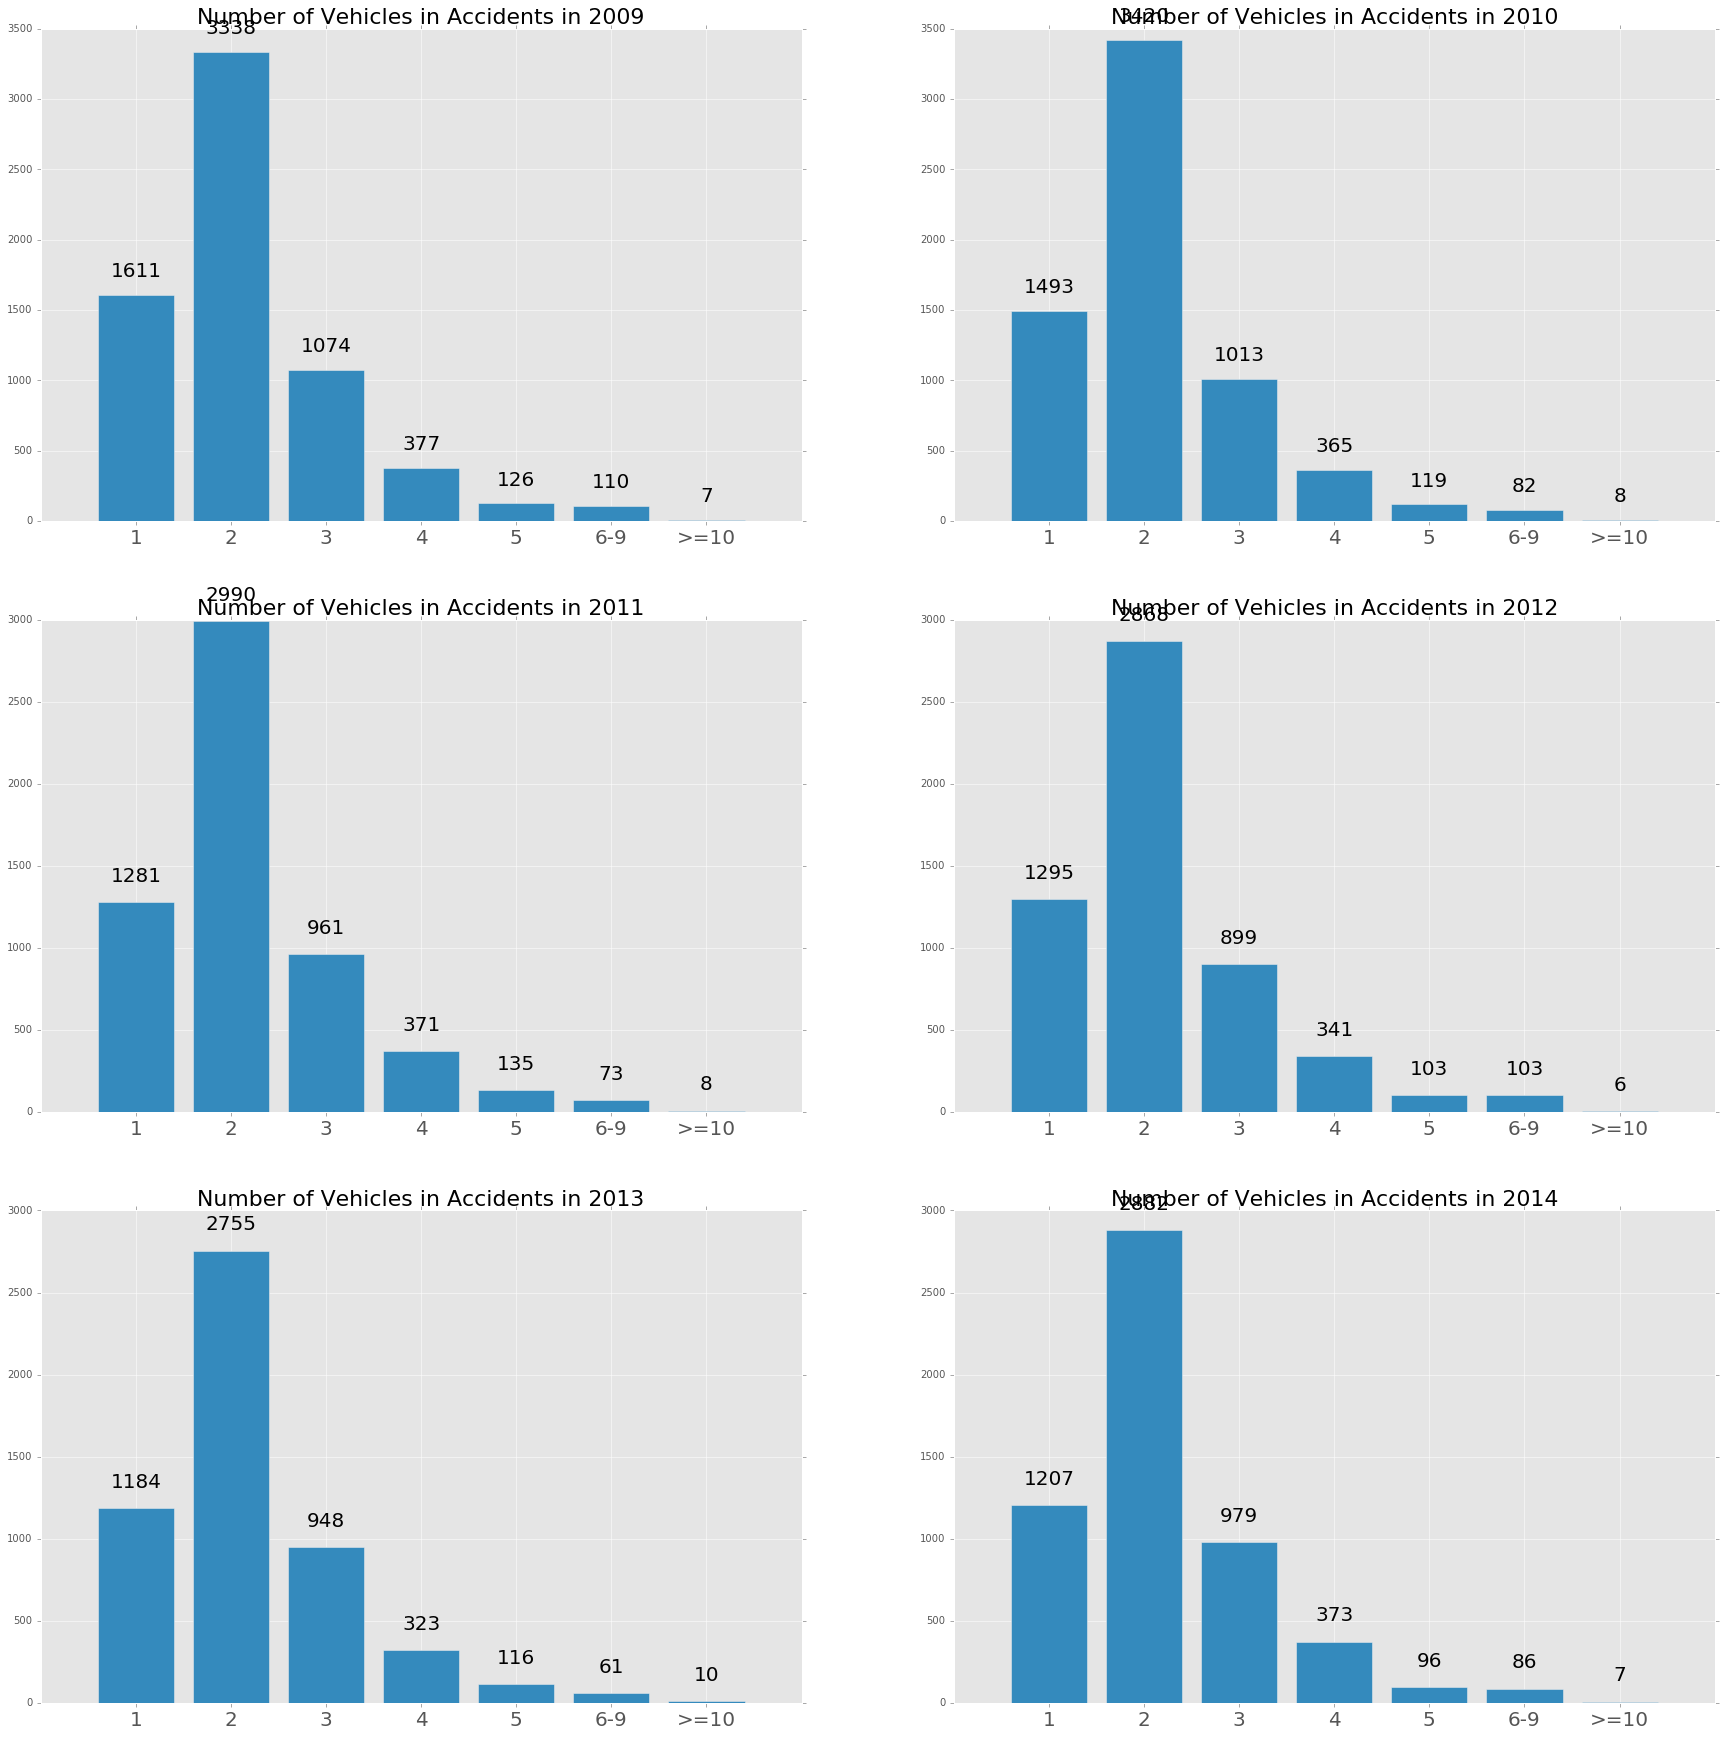

In [32]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
plt.figure(figsize = (30,30))
nfig = 1
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    s = df['Number_of_Vehicles'].value_counts()
    bins = [0]*7
    s = s.sort_index(axis = 0, ascending = True)
    for i in range(6):
        bins[i] = s[i+1]
    bins[5] = sum(s.loc[6:9])
    bins[6] = sum(s.loc[10:])
    plt.subplot(3,2,nfig)
    index = range(1,8)
    plt.bar(index, bins,align = 'center')
    labels = ['1','2','3','4','5','6-9','>=10']
    plt.title('Number of Vehicles in Accidents in ' + year, fontsize = 22)
    plt.xticks(index,labels, fontsize = 20)
    for j, v in zip(index, bins):
        plt.text(j, v+100, v, ha='center', va='bottom',fontsize = 20)
    nfig += 1

## Correlagram demo

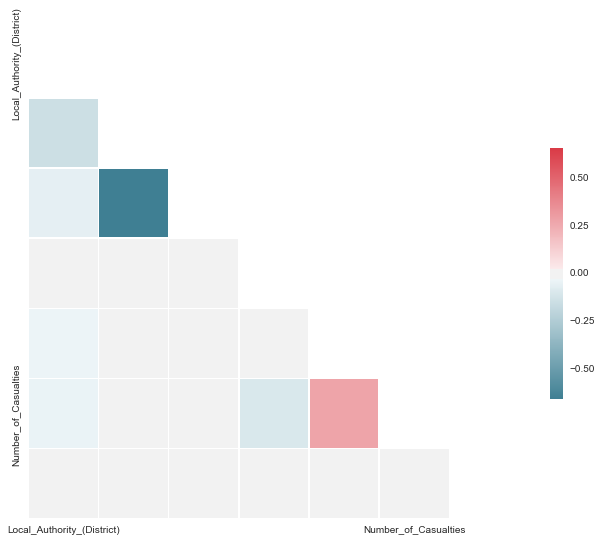

In [11]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(letters[:26]))
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
d = df[['Local_Authority_(District)','Longitude', 'Latitude','Accident_Severity', 'Number_of_Vehicles','Number_of_Casualties', 'Day_of_Week']]
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [12]:
corr

,Local_Authority_(District),Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week
Local_Authority_(District),1.000000,-0.144256,-0.056979,-0.004624,-0.035161,-0.040959,-0.003465
Longitude,-0.144256,1.000000,-0.659230,0.010028,-0.010455,0.012596,0.003221
Latitude,-0.056979,-0.659230,1.000000,0.004039,-0.006154,-0.012924,-0.012499
Accident_Severity,-0.004624,0.010028,0.004039,1.000000,0.015741,-0.100480,-0.016630
Number_of_Vehicles,-0.035161,-0.010455,-0.006154,0.015741,1.000000,0.282941,0.024383
Number_of_Casualties,-0.040959,0.012596,-0.012924,-0.100480,0.282941,1.000000,0.008240
Day_of_Week,-0.003465,0.003221,-0.012499,-0.016630,0.024383,0.008240,1.000000


## 2nd_road_number again

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116caac90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b485d0>]], dtype=object)

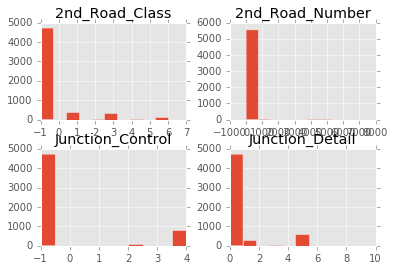

In [2]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df = df[['Junction_Detail','Junction_Control', '2nd_Road_Class','2nd_Road_Number']]
df.hist()

Most accidents did not occured at junction. It can be seen that most records of 2nd_road_number are missing (0). Let's see if 2nd_road information are more complete if there are junction details:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11afa4950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ab64dd0>]], dtype=object)

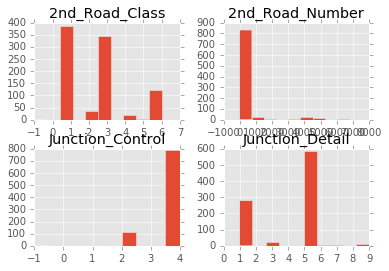

In [4]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df = df[['Junction_Detail','Junction_Control', '2nd_Road_Class','2nd_Road_Number']]
df = df[df['Junction_Detail']>0]

df.hist()

In [5]:
df['2nd_Road_Number'].value_counts()

0       121
1        70
6        54
25       41
4        26
3        20
40       19
20       17
60       17
62       16
167      16
23       15
27       15
8        14
5        12
11       11
61       11
38       10
34       10
18        9
65        9
57        9
56        8
42        8
48        8
4232      7
50        7
460       7
13        6
58        6
       ... 
610       1
217       1
4303      1
1230      1
5223      1
701       1
403       1
77        1
4174      1
82        1
5209      1
688       1
6182      1
97        1
2149      1
683       1
111       1
195       1
346       1
127       1
4229      1
467       1
161       1
642       1
454       1
184       1
186       1
193       1
194       1
690       1
Name: 2nd_Road_Number, dtype: int64

**The number of bins in histgram is limited. Actually, 2nd_road_number still has a lot useful information (not just 0). we can check it in correlogram.** 

## Pedestrian Crossing-Human Control

In [4]:
years = ['2009', '2010', '2011', '2012', '2013', '2014']
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    print df['Pedestrian_Crossing-Human_Control'].value_counts()

0    6642
1       1
Name: Pedestrian_Crossing-Human_Control, dtype: int64
0    6499
2       1
Name: Pedestrian_Crossing-Human_Control, dtype: int64
0    5819
Name: Pedestrian_Crossing-Human_Control, dtype: int64
0    5613
2       1
1       1
Name: Pedestrian_Crossing-Human_Control, dtype: int64
0    5396
1       1
Name: Pedestrian_Crossing-Human_Control, dtype: int64
0    5630
Name: Pedestrian_Crossing-Human_Control, dtype: int64


**Interpretation:**
* 0 - None within 50 metres
* 1 - Control by school crossing patrol
* 2 - Control by other authorised person
* -1 - Data missing or out of range
According to above count, nearly none accident occured at crossing on motorways. Therefore this column is not important for prediction. **<font color="#DC143C">We will remove this redundant information later.</font>**

## Pedestrian Crossing-Physical Facilities

In [5]:
years = ['2009', '2010', '2011', '2012', '2013', '2014']
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    print df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

0    6615
5      13
7      12
8       3
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64
0    6481
7       7
5       7
8       2
4       2
1       1
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64
0    5796
7       9
5       9
4       4
1       1
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64
0    5590
7      10
5       9
8       3
4       3
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64
0    5389
7       5
8       2
5       1
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64
0    5609
7       9
5       7
8       3
4       2
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64


The difference within Pedestrian_Crossing-Physical_Facilities is very small. ** We consider remove it.**

## Light Conditions

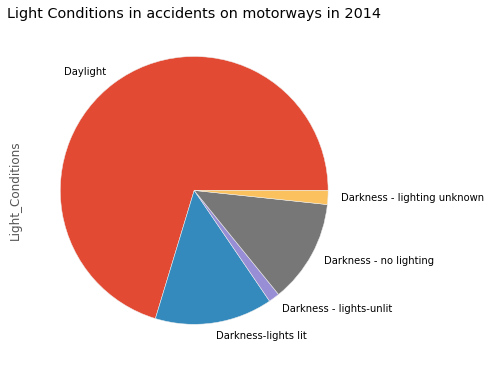

In [13]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
plt.figure(figsize = (6,6))
s = df['Light_Conditions'].value_counts()
s = s.reindex([1,4,5,6,7])
labels = ['Daylight', 'Darkness-lights lit','Darkness - lights-unlit', 'Darkness - no lighting',
         'Darkness - lighting unknown']
s.plot.pie(labels = labels)
plt.title('Light Conditions in accidents on motorways in 2014')
plt.show()

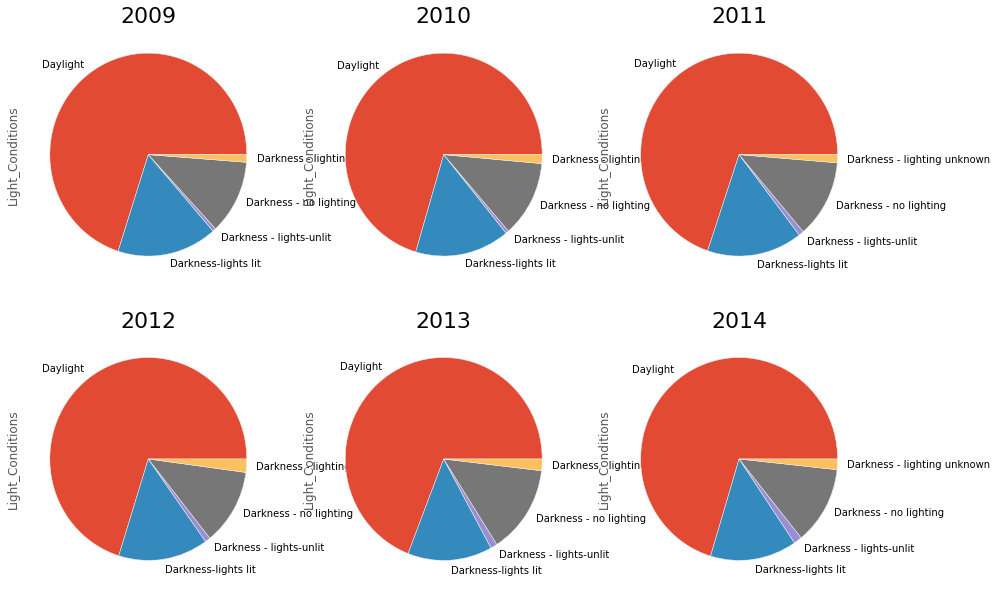

In [18]:
years = ['2009', '2010', '2011', '2012', '2013', '2014']
nfig = 1
plt.figure(figsize = (15,10))
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    s = df['Light_Conditions'].value_counts()
    s = s.reindex([1,4,5,6,7])
    plt.subplot(2,3,nfig)
    labels = ['Daylight', 'Darkness-lights lit','Darkness - lights-unlit', 'Darkness - no lighting',
             'Darkness - lighting unknown']
    s.plot.pie(labels = labels)
    plt.title(year, fontsize = 22)
    nfig += 1

## Weather Conditions

1    4369
2     820
5     198
4      74
9      62
8      54
7      29
3      15
6       9
Name: Weather_Conditions, dtype: int64


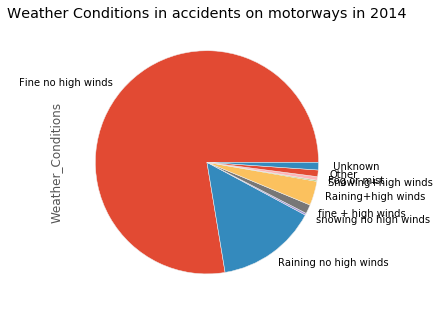

In [21]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
plt.figure(figsize = (5,5))
s = df['Weather_Conditions'].value_counts()
print s
s = s.reindex(range(1,10))
labels = ['Fine no high winds', 'Raining no high winds','snowing no high winds', 'fine + high winds',
         'Raining+high winds', 'Snowing+high winds', 'Fog or mist', 'Other', ' Unknown']
s.plot.pie(labels = labels)
plt.title('Weather Conditions in accidents on motorways in 2014')
plt.show()

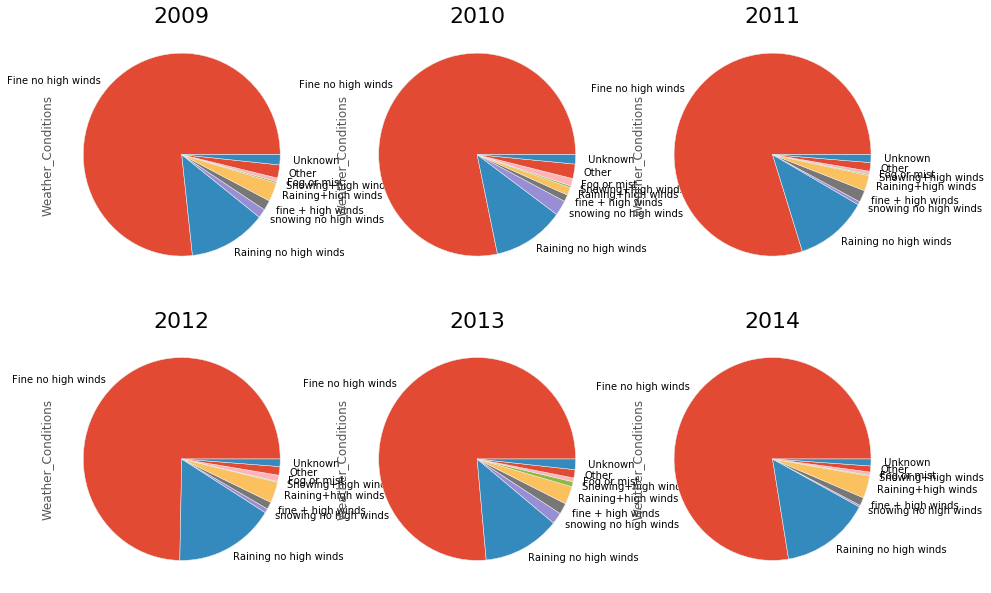

In [24]:
years = ['2009', '2010', '2011', '2012', '2013', '2014']
nfig = 1
plt.figure(figsize = (15,10))
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    s = df['Weather_Conditions'].value_counts()
    s = s.reindex(range(1,10))
    plt.subplot(2,3,nfig)
    labels = ['Fine no high winds', 'Raining no high winds','snowing no high winds', 'fine + high winds',
         'Raining+high winds', 'Snowing+high winds', 'Fog or mist', 'Other', ' Unknown']
    s.plot.pie(labels = labels)
    plt.title(year, fontsize = 22)
    nfig += 1

## Road Surface Conditions

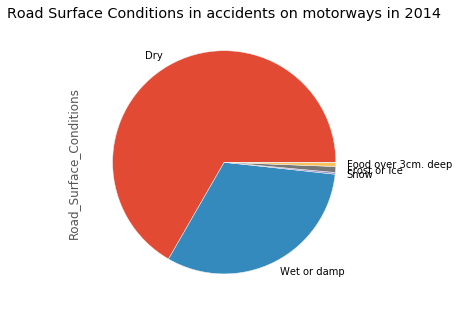

In [3]:
from func.plot import *
labels = ['Dry', 'Wet or damp', 'Snow', 'Frost or ice', 'Food over 3cm. deep', 'Oil or diesel', 'Mud']
title = 'Road Surface Conditions in accidents on motorways in 2014'
pieplot_year(column = 'Road_Surface_Conditions', index = range(1,8),labels = labels, title = title)

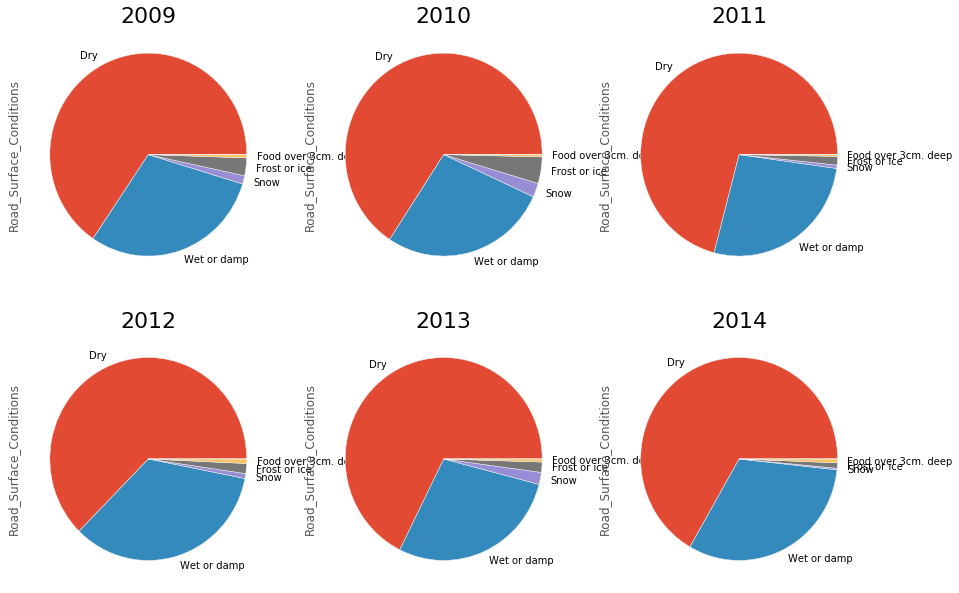

In [3]:
from func.plot import *
labels = ['Dry', 'Wet or damp', 'Snow', 'Frost or ice', 'Food over 3cm. deep', 'Oil or diesel', 'Mud']
pieplot_years(column = 'Road_Surface_Conditions', index = range(1,8),labels = labels)

Patterns of raod surface condition are similar in each year. in 2014, more percentage of accidents occured on road with dry surface. However, the difference in this columns is small. We will decide if remove this column after compute its correlation with interesting variables.

## Special Conditions at Site

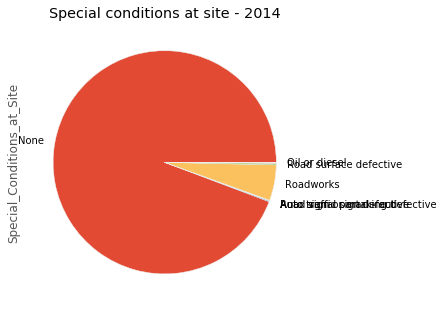

In [5]:
from func.plot import *
labels = ['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective',
          'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud', 'Data missing or out of range']
title = 'Special conditions at site - 2014'
index = [0,1,2,3,4,5,6,7,-1]
pieplot_year(column = 'Special_Conditions_at_Site', index = index,labels = labels, title = title)

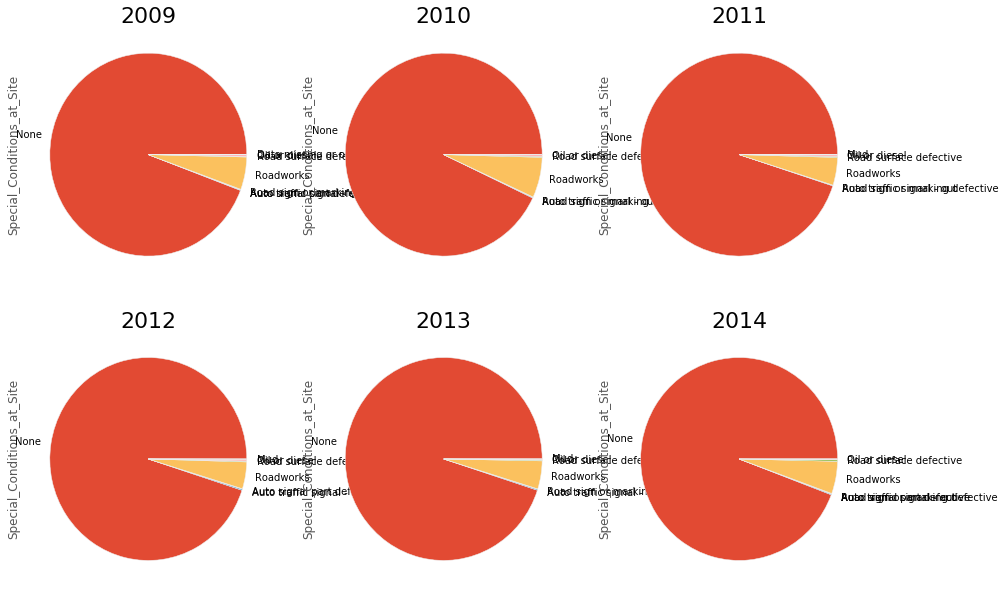

In [6]:
from func.plot import *
labels = ['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective',
          'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud', 'Data missing or out of range']
index = [0,1,2,3,4,5,6,7,-1]
pieplot_years(column = 'Special_Conditions_at_Site', index = index,labels = labels)

In [8]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df['Special_Conditions_at_Site'].value_counts()

0    5307
4     290
5      13
6       8
1       8
3       3
2       1
Name: Special_Conditions_at_Site, dtype: int64

From above, roadworks ranks the 2nd one. So **roadworks increases the risk of accident on road**.

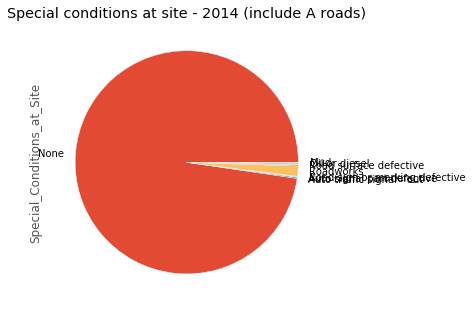

In [3]:
from func.plot import *
labels = ['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective',
          'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud', 'Data missing or out of range']
title = 'Special conditions at site - 2014 (include A roads)'
index = [0,1,2,3,4,5,6,7,-1]
pieplot_year(column = 'Special_Conditions_at_Site', data = 'data1/Accidents_', year = '2014', index = index,labels = labels, title = title)

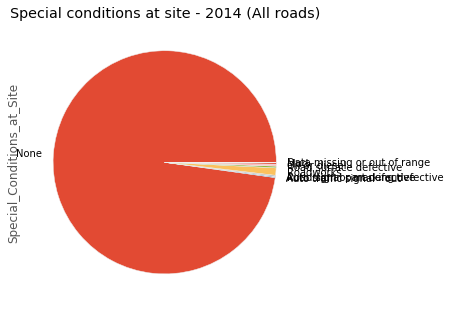

In [4]:
from func.plot import *
labels = ['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective',
          'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud', 'Data missing or out of range']
title = 'Special conditions at site - 2014 (All roads)'
index = [0,1,2,3,4,5,6,7,-1]
pieplot_year(column = 'Special_Conditions_at_Site', data = 'data/DfTRoadSafety_Accidents_', year = '2014', index = index,labels = labels, title = title)

## Carriageway Hazards

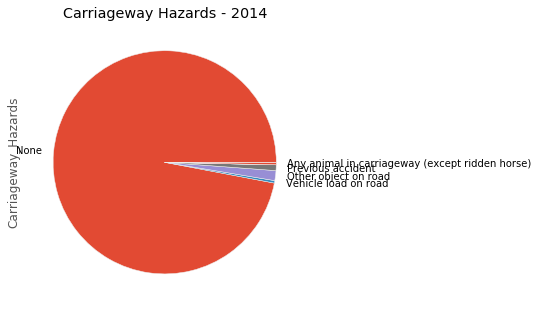

In [10]:
from func.plot import *
labels = ['None', 'Vehicle load on road', 'Other object on road', 'Previous accident',
          'Dog on road', 'Other animal on road', 'Pedestrian in carriageway - not injured',
          'Any animal in carriageway (except ridden horse)', 'Data missing or out of range']
title = 'Carriageway Hazards - 2014'
index = [0,1,2,3,4,5,6,7,-1]
pieplot_year(column = 'Carriageway_Hazards', index = index,labels = labels, title = title)

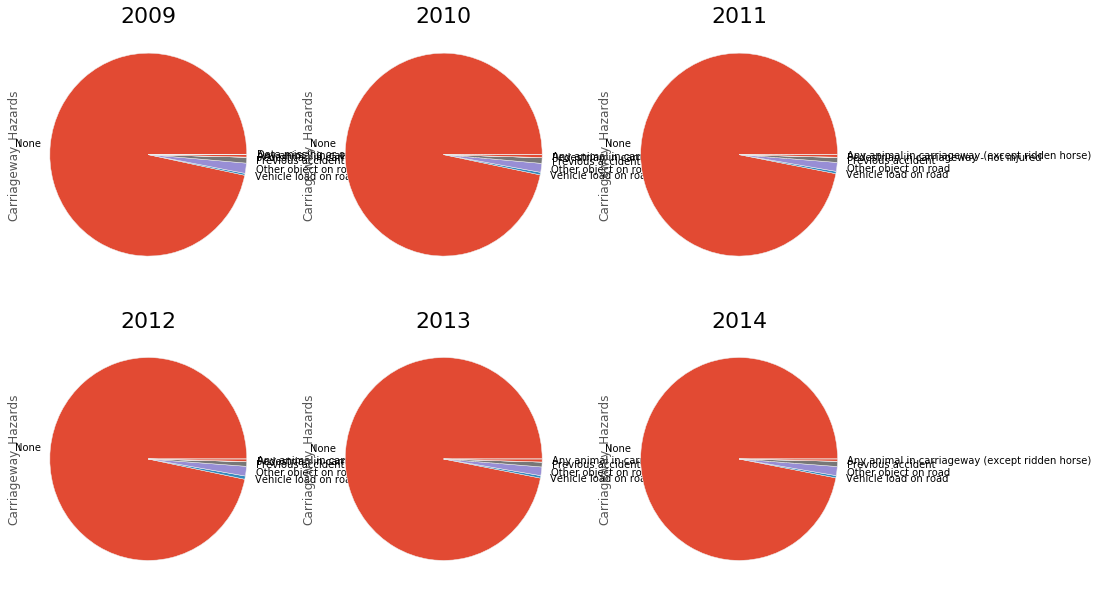

In [11]:
from func.plot import *
labels = ['None', 'Vehicle load on road', 'Other object on road', 'Previous accident',
          'Dog on road', 'Other animal on road', 'Pedestrian in carriageway - not injured',
          'Any animal in carriageway (except ridden horse)', 'Data missing or out of range']
index = [0,1,2,3,4,5,6,7,-1]
pieplot_years(column = 'Carriageway_Hazards', index = index,labels = labels)

Few accidents occured when there are carriageway hazards. ** Should check this its correlation with location and time again.**

## Urban or Rural Area

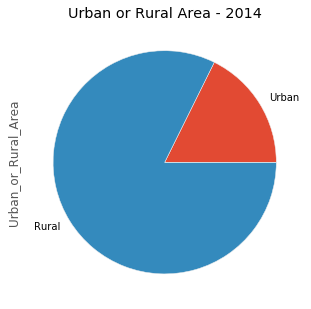

In [12]:
from func.plot import *
labels = ['Urban', 'Rural', 'Unallocated']
title = 'Urban or Rural Area - 2014'
index = [1,2,3]
pieplot_year(column = 'Urban_or_Rural_Area', index = index,labels = labels, title = title)

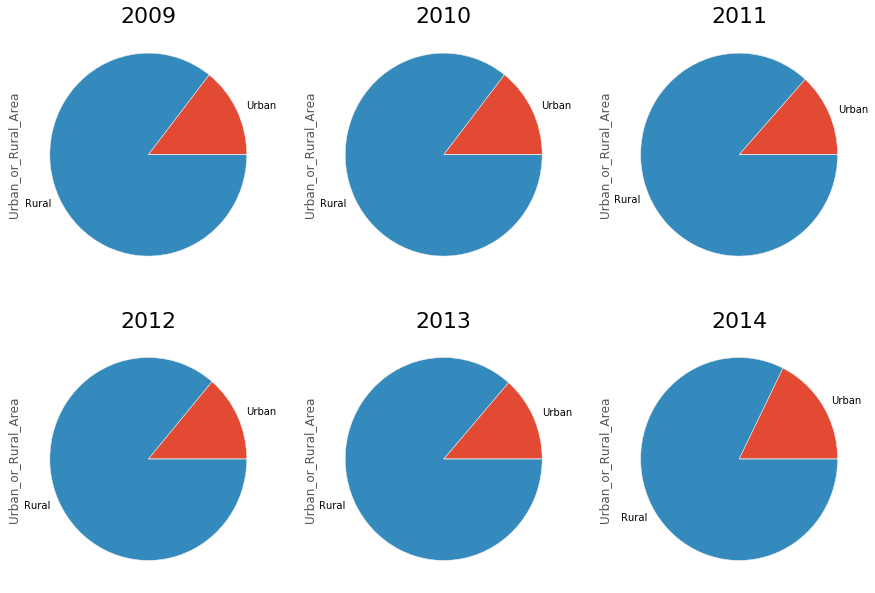

In [13]:
from func.plot import *
labels = ['Urban', 'Rural', 'Unallocated']
index = [1,2,3]
pieplot_years(column = 'Urban_or_Rural_Area', index = index,labels = labels)

In 2014, the percentage of accidents occured in Urban area increased.

,2009,2010,2011,2012,2013,2014
Urban_or_Rural_Area,,,,,,
Urban,957,938,775,775,732,995
Rural,5686,5562,5044,4840,4665,4635


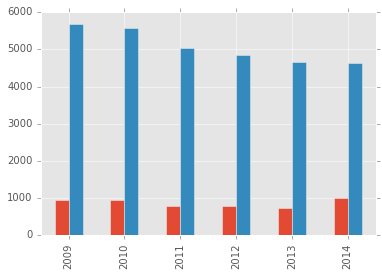

In [27]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Urban_or_Rural_Area'].value_counts()
    d[year] = n[i].reindex([1,2])
df = pd.DataFrame(d,index = [1,2])
df['Urban_or_Rural_Area'] = pd.Series(['Urban', 'Rural'],index=[1,2])
df = df.set_index('Urban_or_Rural_Area')
display(df)
df2 = df.T
df2.plot.bar(mark_right=False, legend = False)

**Accidents in urban area increased greatly in 2014**

## Did Police Officer Attend Scene of Accident

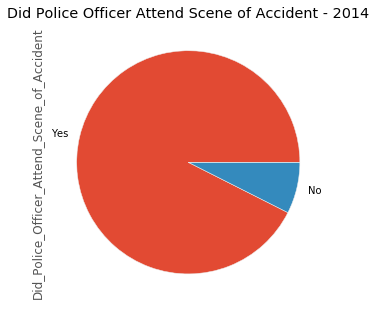

In [29]:
from func.plot import *
labels = ['Yes', 'No', 'No - self report']
title = 'Did Police Officer Attend Scene of Accident - 2014'
index = [1,2,3]
pieplot_year(column = 'Did_Police_Officer_Attend_Scene_of_Accident', index = index,labels = labels, title = title)

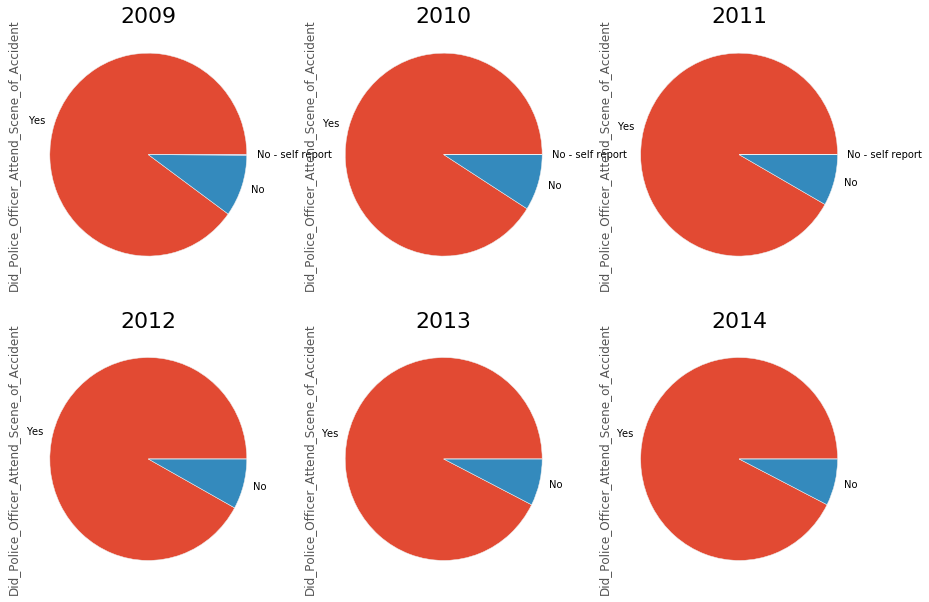

In [30]:
from func.plot import *
labels = ['Yes', 'No', 'No - self report']
index = [1,2,3]
pieplot_years(column = 'Did_Police_Officer_Attend_Scene_of_Accident', index = index,labels = labels)

In [32]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df['LSOA_of_Accident_Location'].value_counts()


E01016481    41
E01023722    40
E01017620    37
E01023584    35
E01018648    33
E01024335    28
E01030685    26
E01030815    26
E01023732    25
E01030598    24
E01030735    24
E01018337    23
E01024421    22
E01024173    22
E01007611    21
E01007670    21
E01021800    20
E01024786    20
E01031028    19
E01031587    19
E01018418    19
E01018722    18
E01023170    17
E01023171    17
E01018598    17
E01031159    17
E01017562    17
E01030458    17
E01024416    17
E01018465    16
             ..
E01012632     1
E01023106     1
E01022462     1
E01029270     1
E01010105     1
E01007603     1
E01022469     1
E01002296     1
E01029283     1
E01032619     1
E01016661     1
E01029282     1
E01018239     1
E01005719     1
E01017826     1
E01011522     1
E01031588     1
E01024926     1
E01024922     1
E01017754     1
E01022949     1
E01006025     1
E01011553     1
E01011551     1
E01007681     1
E01005705     1
E01005950     1
E01020724     1
E01030658     1
E01012459     1
Name: LSOA_of_Accident_L

## Correlogram

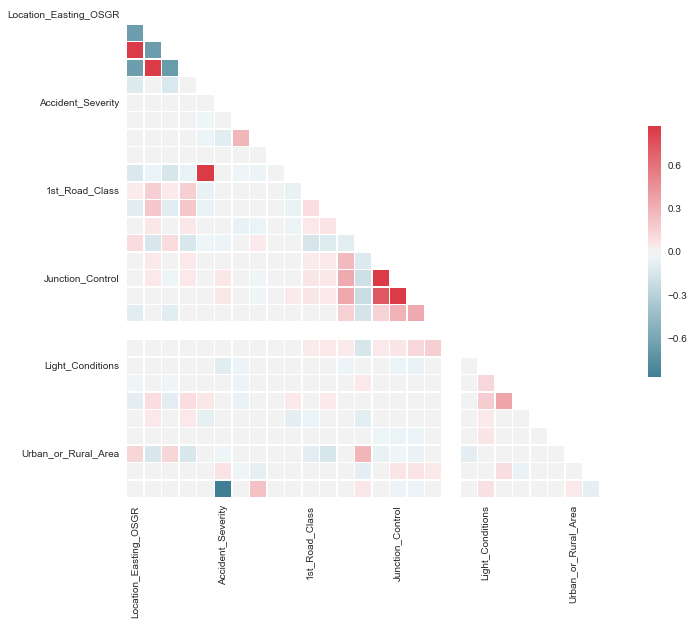

In [16]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(letters[:26]))
df = pd.read_csv('data2/Accidents_kis_2014.csv',low_memory=False)
d = df[[u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', 'Number_of_KIS']]
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

missing one: Pedestrian_Crossing-Human_Control. The contents of this column are nearly all zero.

## Roadwork Analysis

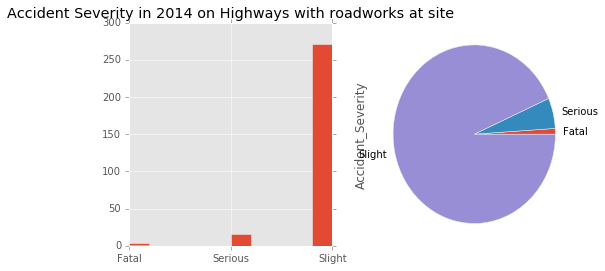

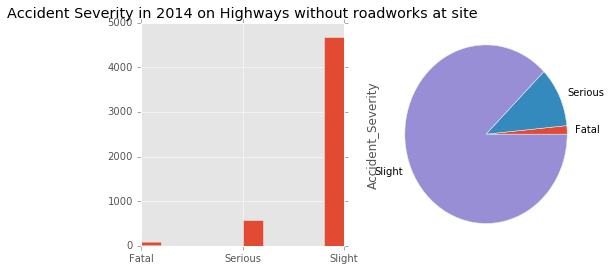

In [15]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df1 = df[df['Special_Conditions_at_Site']==4] # roadworks at site
df2 = df[df['Special_Conditions_at_Site']!=4] # roadworks at site

df1 = df1['Accident_Severity']
df2 = df2['Accident_Severity']
i = 0
for df in [df1,df2]:
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    df.hist()
    plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
    if i == 0:
        plt.title('Accident Severity in 2014 on Highways with roadworks at site')
    else:
        plt.title('Accident Severity in 2014 on Highways without roadworks at site')

    plt.subplot(1,2,2)
    s = df.value_counts()
    s = s.reindex([1,2,3])
    labels = ['Fatal', 'Serious','Slight']
    s.plot.pie(labels = labels)
    plt.show()
    i += 1

Above charts show roadworks do not increase the risk of serious accidents. 

In [17]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df = df[df['Special_Conditions_at_Site']==4]
df[['Date', 'Time']]

,Date,Time
107,22/01/2014,06:35
109,10/02/2014,16:15
110,02/03/2014,12:25
111,07/03/2014,17:25
112,25/03/2014,16:17
113,01/04/2014,06:24
114,22/05/2014,16:32
129,09/01/2014,23:30
140,26/03/2014,00:59
167,03/10/2014,21:07


In [14]:
a = '11/1/2014'
print a
print time.strptime(a,"%d/%m/%Y")


11/1/2014
time.struct_time(tm_year=2014, tm_mon=1, tm_mday=11, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=11, tm_isdst=-1)


The data is not ranked as time series.

In [10]:
df[['Date', 'Time']]

,Date,Time
107,22/01/2014,06:35
109,10/02/2014,16:15
110,02/03/2014,12:25
111,07/03/2014,17:25
112,25/03/2014,16:17
113,01/04/2014,06:24
114,22/05/2014,16:32
129,09/01/2014,23:30
140,26/03/2014,00:59
167,03/10/2014,21:07


## The number of accident in different months

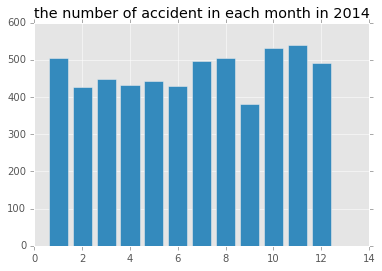

In [21]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
date = df['Date'].values
n = len(date)
month = pd.Series([0]*n)
i = 0
for d in date:
    m = d.split('/')[1]
    month[i] = m
    i+=1
months = month.value_counts()
months = months.reindex(range(1,13))
plt.bar(months.index, months.values,align = 'center')
plt.title('the number of accident in each month in 2014')

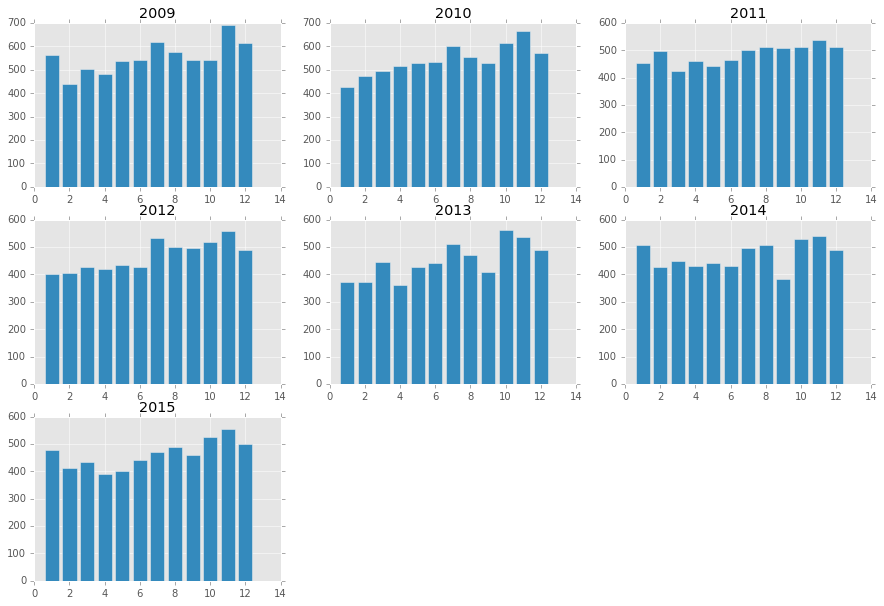

In [22]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 1

for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    date = df['Date'].values
    n = len(date)
    month = pd.Series([0]*n)
    i = 0
    for d in date:
        m = d.split('/')[1]
        month[i] = m
        i+=1
    months = month.value_counts()
    months = months.reindex(range(1,13))
    plt.subplot(3,3,nfig)
    plt.bar(months.index, months.values,align = 'center')
    plt.title(year)
    nfig += 1

interval = one week

the number of bins = 52

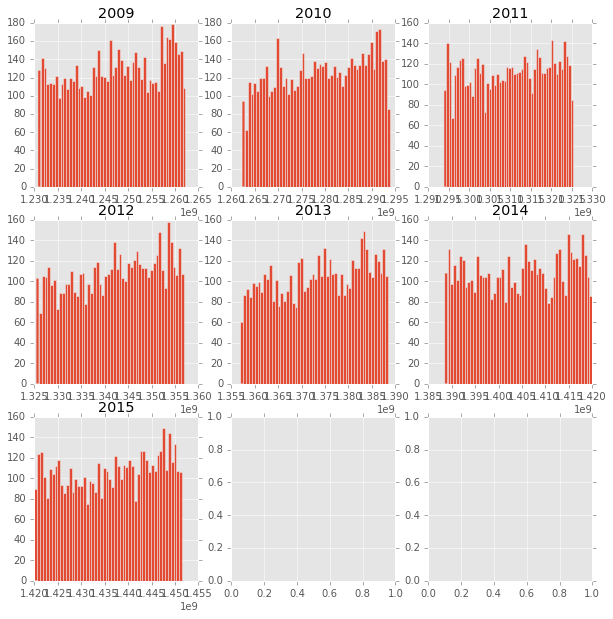

In [78]:
import time
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    date = df['Date'].values
    n = len(date)
    month = pd.Series([0]*n)
    i = 0
    for d in date:
        timeArray = time.strptime(d, "%d/%m/%Y")
        month[i] = int(time.mktime(timeArray))
        i+=1
    month.hist(bins = 52, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

interval = half month

the number of bins = 24

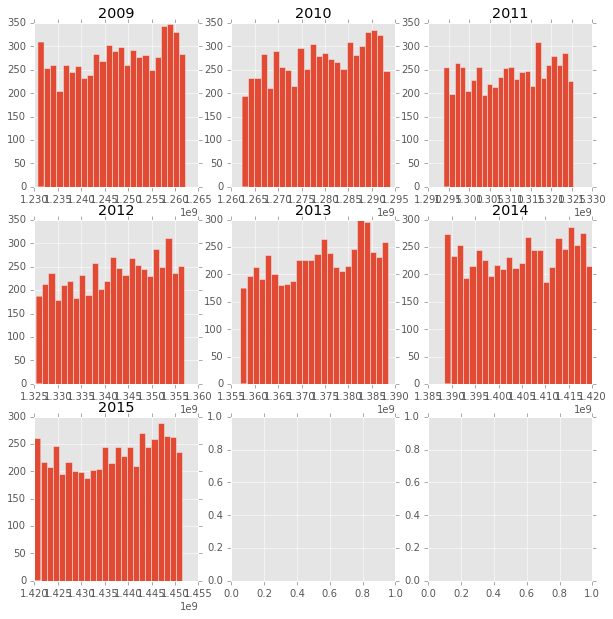

In [79]:
import time
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    date = df['Date'].values
    n = len(date)
    month = pd.Series([0]*n)
    i = 0
    for d in date:
        timeArray = time.strptime(d, "%d/%m/%Y")
        month[i] = int(time.mktime(timeArray))
        i+=1
    month.hist(bins = 24, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

## The number of accident in different time of the day

** 1. Interval = 1 hour **

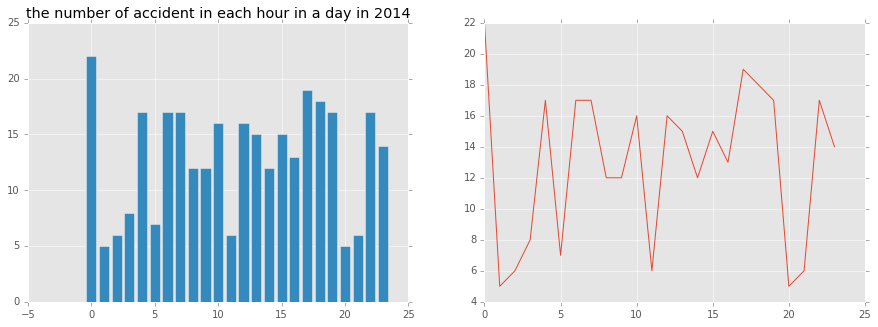

In [60]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
times = df['Time'].values
n = len(times)
hour = pd.Series([0]*n)
i = 0
for t in times:
    h = t.split(':')[0]
    hour[i] = h
    i+=1
hours = hour.value_counts()
hours = hour.reindex(range(24))
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.bar(hours.index, hours.values,align = 'center')
plt.title('the number of accident in each hour in a day in 2014')
plt.subplot(1,2,2)
plt.plot(hours.index, hours.values)

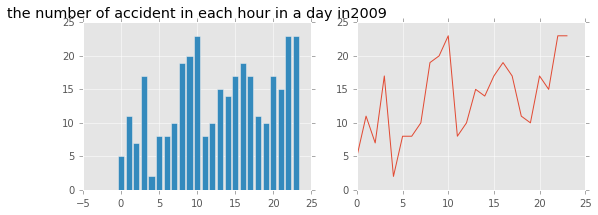

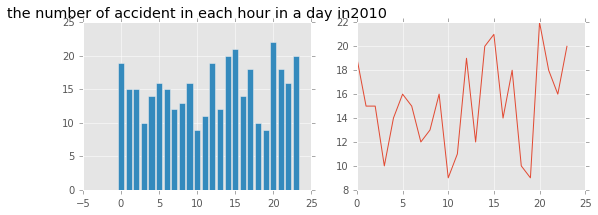

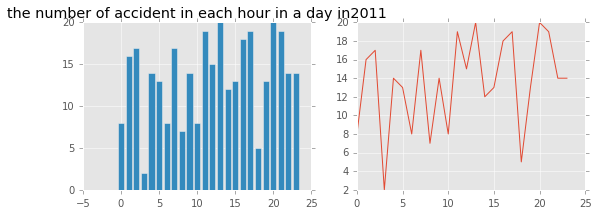

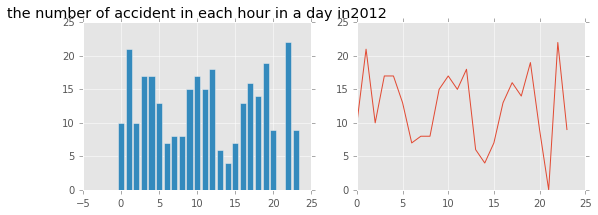

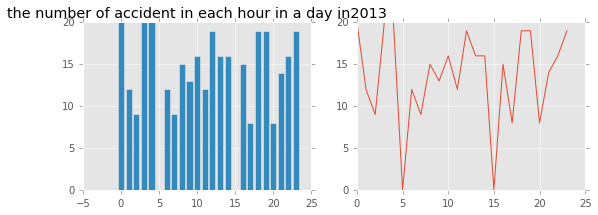

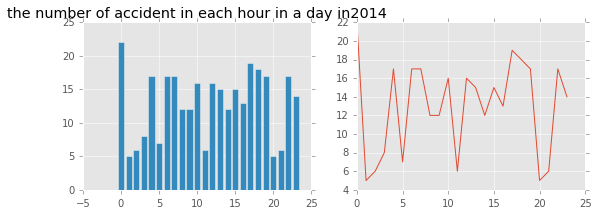

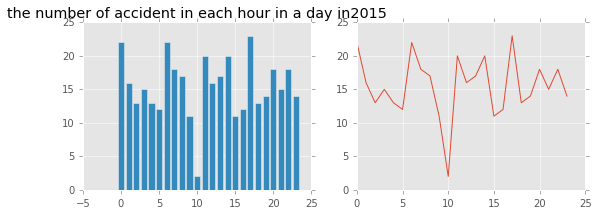

In [61]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 1
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0]*n)
    i = 0
    for t in times:
        h = t.split(':')[0]
        hour[i] = h
        i+=1
    hours = hour.value_counts()
    hours = hour.reindex(range(24))
    plt.figure(figsize = (9,3))
    plt.subplot(1,2,1)
    plt.bar(hours.index, hours.values,align = 'center')
    plt.title('the number of accident in each hour in a day in' + year)
    plt.subplot(1,2,2)
    plt.plot(hours.index, hours.values)

** 2. interval = 30 min **

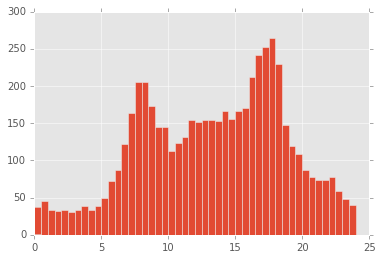

In [48]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
times = df['Time'].values
n = len(times)
hour = pd.Series([0.0]*n)
i = 0
for t in times:
    hm = t.split(':')
    hour[i] = float(hm[0]) + float(hm[1])/60
    i+=1
hour.hist(bins = 48)

** 3. interval = 15 min **

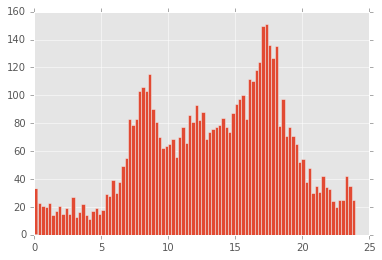

In [52]:
df = pd.read_csv('data2/Accidents_2011.csv',low_memory=False)
times = df['Time'].values
n = len(times)
hour = pd.Series([0.0]*n)
i = 0
for t in times:
    hm = t.split(':')
    hour[i] = float(hm[0]) + float(hm[1])/60
    i+=1
hour.hist(bins = 96)

** 4. interval = 30 min.**
The number of accident at the time of a day in each year

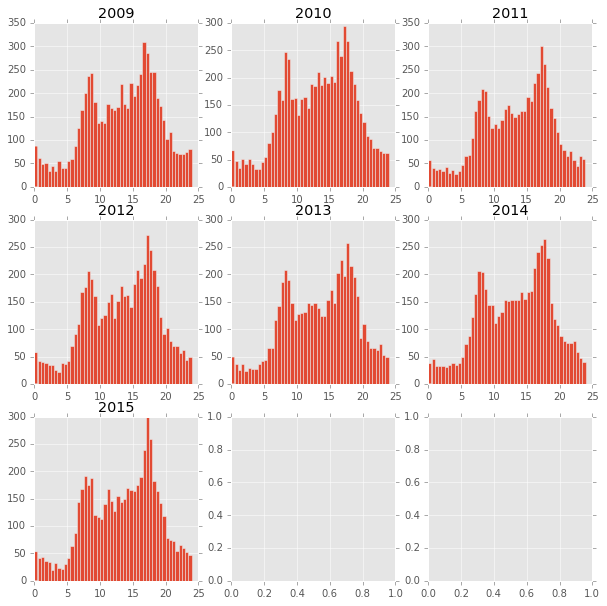

In [80]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

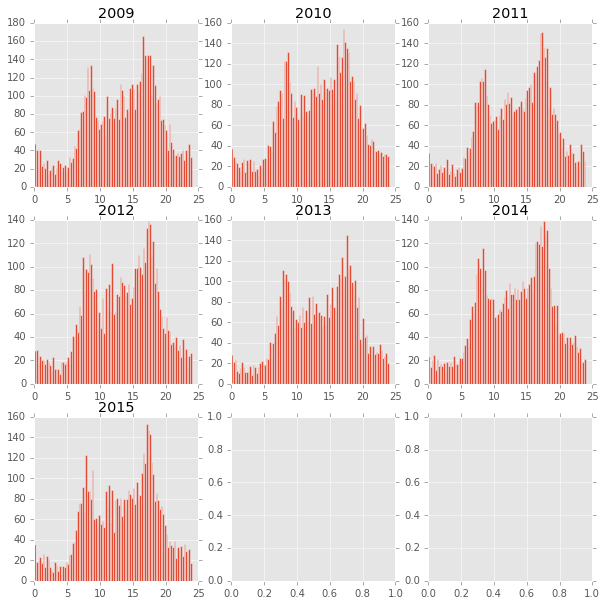

In [81]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)    
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 96, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

## Junction

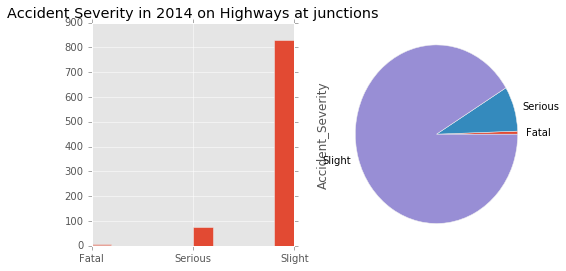

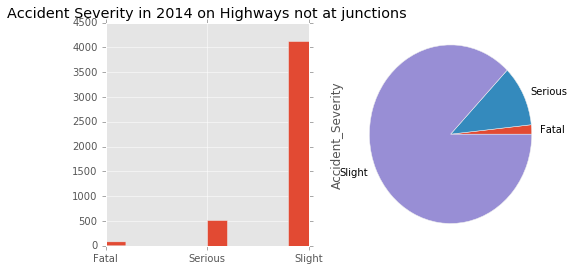

In [8]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df1 = df[df['Junction_Detail']!=0] # at junctions
df2 = df[df['Junction_Detail']==0] # not at junctions

df1 = df1['Accident_Severity']
df2 = df2['Accident_Severity']
i = 0
for df in [df1,df2]:
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    df.hist()
    plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
    if i == 0:
        plt.title('Accident Severity in 2014 on Highways at junctions')
    else:
        plt.title('Accident Severity in 2014 on Highways not at junctions')

    plt.subplot(1,2,2)
    s = df.value_counts()
    s = s.reindex([1,2,3])
    labels = ['Fatal', 'Serious','Slight']
    s.plot.pie(labels = labels)
    plt.show()
    i += 1

Fatal or serious accidents accounts less at junctions.

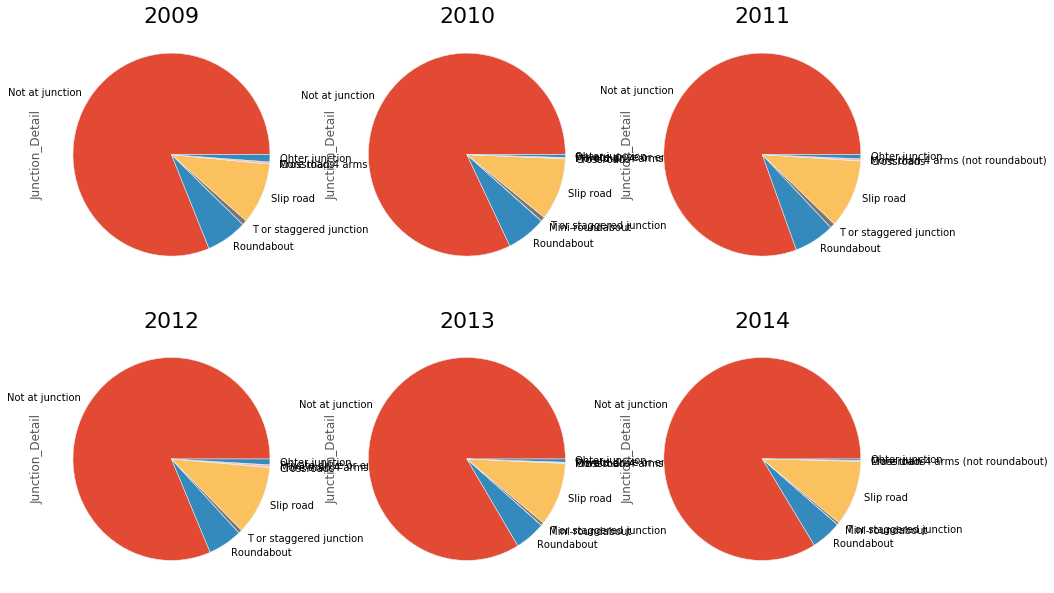

In [9]:
from func.plot import *
labels = ['Not at junction', 'Roundabout', 'Mini-roundabout', 'T or staggered junction', 'Slip road',
         'Crossroads', 'More than 4 arms (not roundabout)', 'Private drive or entrance', 'Ohter junction',]
index = [0,1,2,3,5,6,7,8,9]
pieplot_years(column = 'Junction_Detail', index = index,labels = labels)